<a href="https://colab.research.google.com/github/dineshkumarsarangapani/VectorSearch-A-guide/blob/main/Vector_Search_A_complete_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Author: Dinesh Kumar S (msg2dineshkumar@gmail.com)
* Github: https://github.com/dineshkumarsarangapani

# History of search
## Keyword-based Search
* Basics of keyword-based search
* Boolean operators (AND, OR, NOT)
* Inverted index and posting lists
* Ranking algorithms based on term frequency and inverse document frequency (TF-IDF)
* Limitations of keyword-based search (e.g., lack of semantic understanding)


# Basics of keyword-based search

In [ ]:

# List of documents
documents = [
    "The sky is blue.",
    "The sun is bright.",
    "The sky is clear.",
    "The moon is beautiful.",
    "The stars are twinkling."
]

# Function to perform keyword-based search
def keyword_search(documents, query):
    results = []
    for i, doc in enumerate(documents):
        if query in doc:
            results.append(i)
    return results

# User query
query = "sky"

# Perform keyword-based search
search_results = keyword_search(documents, query)

# Print the search results
if len(search_results) > 0:
    print("Search Results for '{}':".format(query))
    for result in search_results:
        print("- Document {}: {}".format(result, documents[result]))
else:
    print("No results found for '{}.'".format(query))


Search Results for 'sky':
- Document 0: The sky is blue.
- Document 2: The sky is clear.


# Inverted index and posting lists

In [ ]:
# List of documents
documents = [
    "The sky is blue.",
    "The sun is bright.",
    "The sky is clear.",
    "The moon is beautiful.",
    "The stars are twinkling."
]

# Function to build an inverted index
def build_inverted_index(documents):
    inverted_index = {}
    for i, doc in enumerate(documents):
        # Tokenize the document
        tokens = doc.lower().split()
        for token in tokens:
            if token not in inverted_index:
                inverted_index[token] = [i]
            else:
                inverted_index[token].append(i)
    return inverted_index

# Build the inverted index
inverted_index = build_inverted_index(documents)

# Function to perform keyword-based search using inverted index
def keyword_search(query, inverted_index):
    query_tokens = query.lower().split()
    results = set()
    for token in query_tokens:
        if token in inverted_index:
            results.update(inverted_index[token])
    return results

# User query
query = "sky"

# Perform keyword-based search using inverted index
search_results = keyword_search(query, inverted_index)

# Print the search results
if len(search_results) > 0:
    print("Search Results for '{}':".format(query))
    for result in search_results:
        print("- Document {}: {}".format(result, documents[result]))
else:
    print("No results found for '{}.'".format(query))


Search Results for 'sky':
- Document 0: The sky is blue.
- Document 2: The sky is clear.


# Term Frequency and Inverse Document Frequency
Inverse Document Frequency (TF-IDF) is a widely used statistical method in natural language processing and information retrieval. It measures how important a term is within a document relative to a collection of documents (i.e., relative to a corpus).

## Term Frequency

TF of a term or word is the number of times the term appears in a document compared to the total number of words in the document.

\begin{align}
TF = \frac {\textrm{number of times the term appears in the document}}{\textrm{total number of terms in the document}}
\end{align}
## Inverse Document Frequency

IDF of a term reflects the proportion of documents in the corpus that contain the term. Words unique to a small percentage of documents (e.g., technical jargon terms) receive higher importance values than words common across all documents (e.g., a, the, and).

\begin{align}
IDF = log (\frac {\textrm{number of the documents in the corpus}} {\textrm{number of documents in the corpus contain the term}})
\end{align}



### The TF-IDF of a term is calculated by multiplying TF and IDF scores.

\begin{align}
\textit{TF-IDF} = TF * IDF
\end{align}








In [ ]:
import math
from collections import Counter

# List of documents
documents = [
    "The sky is blue.",
    "The sun is bright.",
    "The sky is clear.",
    "The moon is beautiful.",
    "The stars are twinkling."
]

# Function to calculate term frequency (TF) for a single document
def calculate_tf(document):
    word_count = Counter(document.lower().split())
    tf = {word: count / len(document.split()) for word, count in word_count.items()}
    return tf

# Function to calculate inverse document frequency (IDF)
def calculate_idf(documents):
    document_count = len(documents)
    idf = {}
    for document in documents:
        unique_words = set(document.lower().split())
        for word in unique_words:
            if word not in idf:
                idf[word] = math.log(document_count / sum(1 for doc in documents if word in doc.lower()))
    return idf

# Function to calculate TF-IDF scores
def calculate_tfidf(documents):
    tfidf_scores = []
    idf = calculate_idf(documents)
    for document in documents:
        tf = calculate_tf(document)
        tfidf = {word: tf[word] * idf[word] for word in tf}
        tfidf_scores.append(tfidf)
    return tfidf_scores

# Calculate TF-IDF scores for the documents
tfidf_scores = calculate_tfidf(documents)

# Print the TF-IDF scores for each document
for i, tfidf in enumerate(tfidf_scores):
    print("TF-IDF scores for Document {}: ".format(i))
    for word, score in tfidf.items():
        print("- {} : {}".format(word, score))


TF-IDF scores for Document 0: 
- the : 0.0
- sky : 0.22907268296853878
- is : 0.05578588782855244
- blue. : 0.40235947810852507
TF-IDF scores for Document 1: 
- the : 0.0
- sun : 0.40235947810852507
- is : 0.05578588782855244
- bright. : 0.40235947810852507
TF-IDF scores for Document 2: 
- the : 0.0
- sky : 0.22907268296853878
- is : 0.05578588782855244
- clear. : 0.40235947810852507
TF-IDF scores for Document 3: 
- the : 0.0
- moon : 0.40235947810852507
- is : 0.05578588782855244
- beautiful. : 0.40235947810852507
TF-IDF scores for Document 4: 
- the : 0.0
- stars : 0.40235947810852507
- are : 0.40235947810852507
- twinkling. : 0.40235947810852507


## Information Retrieval Models:

* Boolean model of information retrieval
* Probabilistic models (e.g., Okapi BM25)
* Latent Semantic Indexing (LSI)
* Latent Dirichlet Allocation (LDA)

# Boolean model of information retrieval

The (standard) Boolean model of information retrieval (BIR) is a classical information retrieval (IR) model and, at the same time, the first and most-adopted one. It is used by many IR systems to this day.The BIR is based on Boolean logic and classical set theory in that both the documents to be searched and the user's query are conceived as sets of terms (a bag-of-words model). Retrieval is based on whether or not the documents contain the query terms.

In [ ]:
import math
from collections import Counter

# List of documents
documents = [
    "The sky is blue.",
    "The sun is bright.",
    "The sky is clear.",
    "The moon is beautiful.",
    "The stars are twinkling.",
    "The dog barks",
    "the dog is black"
]

# Function to calculate term frequency (TF) for a document
def calculate_tf(document):
    word_count = Counter(document.lower().split())
    tf = {word: count / len(document.split()) for word, count in word_count.items()}
    return tf

# Function to calculate inverse document frequency (IDF) for a term
def calculate_idf(term, documents):
    document_count = len(documents)
    count = sum(1 for doc in documents if term in doc.lower())
    idf = math.log(document_count / count)
    return idf

# Function to calculate the VSM representation for a document
def calculate_vsm(document, documents):
    vsm = {}
    tf = calculate_tf(document)
    for term in tf:
        idf = calculate_idf(term, documents)
        vsm[term] = tf[term] * idf
    return vsm

# Extract index terms from the documents
index_terms = set()
for document in documents:
    terms = set(document.lower().split())
    index_terms.update(terms)

# Function to perform Boolean retrieval
def boolean_retrieval(index_terms, documents, query):
    results = set(range(len(documents)))
    for term in query:
        if term[1:] in index_terms:
            term_docs = {i for i, doc in enumerate(documents) if term[1:] in doc}
            if term[0] == '!':
                term_docs = set(range(len(documents))) - term_docs
            if term_docs:
                results = results.intersection(term_docs)
    return results

# User query
# query = input("Enter your search query: ").lower().split()
query = ['(dog|stars|blue)', '!moon', 'twinkling', '!sky']

# Calculate TF-IDF scores for the documents
tfidf_scores = []
for document in documents:
    vsm = calculate_vsm(document, documents)
    tfidf_scores.append(vsm)

# Perform Boolean retrieval
search_results = boolean_retrieval(index_terms, tfidf_scores, query)

# Sort search results based on scores
sorted_results = sorted(search_results, key=lambda x: sum(tfidf_scores[x].values()), reverse=True)

# Print the search results with scores
if len(sorted_results) > 0:
    print("Search Results for '{}':".format(query))
    for result in sorted_results:
        print("- Document {}: {}".format(result, documents[result]))
        # print("  TF-IDF Scores:")
        # for term, score in tfidf_scores[result].items():
        #     print("  - {} : {}".format(term, score))
else:
    print("No results found for '{}.'".format(query))


Search Results for '['(dog|stars|blue)', '!moon', 'twinkling', '!sky']':
- Document 4: The stars are twinkling.
- Document 5: The dog barks
- Document 1: The sun is bright.
- Document 6: the dog is black


# Okapi BM25

### Okapi BM25 formula

\begin{align}
\text{BM25}(D, Q) = \sum_{i=1}^{n} \left( \frac{\text{IDF}(q_i) \cdot \text{TF}(q_i, D) \cdot (k_1 + 1)}{\text{TF}(q_i, D) + k_1 \cdot (1 - b + b \cdot \frac{\text{DL}(D)}{\text{AVDL}} } \right)
\end{align}


In this formula:


* BM25(D,Q) is the BM25 score for document D with respect to query Q.
* n is the total number of terms in the query Q.
* $(q_i)$ i-th term in the query.
* $\text{IDF}(q_i)$ is the inverse document frequency of term $(q_i)$  , which measures the rarity of the term across the entire document collection.
* $\text{TF}(q_i, D)$ is the term frequency of term $(q_i)$ in document D, which measures how often the term appears in the document relative to the total number of terms in the document.
* $(k_1 , b)$are tuning parameters that control the impact of term frequency and document length normalization on the BM25 score.
* $\text{DL}(D)$ represents the length of document D (number of terms in the document).
* AVDL represents the average document length in the entire collection.
The BM25 formula calculates the score by summing the contributions from each term in the query. Each term's contribution is determined by the IDF value, the adjusted TF value, and the document length normalization factor.

The BM25 formula allows for the ranking of documents based on their relevance to a given query, taking into account the frequency of query terms in the document, their rarity in the collection, and the length of the document.




In [ ]:
import math
from collections import Counter
import string

# List of documents
documents = [
    "The sky is blue and beautiful.",
    "The sun is bright in the clear sky.",
    "The moon is beautiful tonight.",
    "Look at the twinkling stars in the sky. sky is black",
    "Blue Sky, Blue Sky why are your beautiful?",
    "Dark sky, Dark sky why are your Fearfull?"
]

# Average document length
avg_doc_length = sum(len(doc.split()) for doc in documents) / len(documents)

# Function to calculate term frequency (TF) for a document
def calculate_tf(document):
    document = document.lower()
    document = document.translate(str.maketrans("", "", string.punctuation))
    word_count = Counter(document.split())
    tf = {word: count / len(document.split()) for word, count in word_count.items()}
    return tf

# Function to calculate inverse document frequency (IDF) for a term
def calculate_idf(term, documents):
    document_count = len(documents)
    count = sum(1 for doc in documents if term in doc.lower().split())
    idf = math.log((document_count + 1) / (count + 0.5))
    return idf

# Function to calculate Okapi BM25 score for a document and query
def calculate_bm25_score(document, query, documents):
    k1 = 1.2
    b = 0.75
    tf = calculate_tf(document)
    score = 0
    for term in query:
        if term.lower() in tf:
            idf = calculate_idf(term, documents)
            numerator = tf[term.lower()] * (k1 + 1)
            denominator = tf[term.lower()] + k1 * (1 - b + b * (len(document.split()) / avg_doc_length))
            score += idf * (numerator / denominator)
    return score

bm25_scores_doc = {}
# Function to perform search using Okapi BM25 scores
def perform_search(query, documents):
    # Calculate Okapi BM25 scores for the documents
    bm25_scores = []
    for document in documents:
        score = calculate_bm25_score(document, query, documents)
        bm25_scores.append(score)
        bm25_scores_doc[document] = score

    # Perform search based on BM25 scores
    search_results = [i for i, score in enumerate(bm25_scores) if score > 0]
    search_results = sorted(search_results, key=lambda i: bm25_scores[i], reverse=True)

    # Return search results
    return search_results

# User query
query = input("Enter your search query: ").lower().split()

# Perform search and get the search results
results = perform_search(query, documents)

# Display search results
print("\nSearch Results:")
if results:
    for result in results:
        print("- Document {}: {} Score is {}".format(result, documents[result], bm25_scores_doc[documents[result]]))
else:
    print("No results found for the given query.")


Enter your search query: sky

Search Results:
- Document 4: Blue Sky, Blue Sky why are your beautiful? Score is 0.16318786325050647
- Document 5: Dark sky, Dark sky why are your Fearfull? Score is 0.16318786325050647
- Document 0: The sky is blue and beautiful. Score is 0.13834614644380808
- Document 3: Look at the twinkling stars in the sky. sky is black Score is 0.09967337166883365
- Document 1: The sun is bright in the clear sky. Score is 0.08907066639569478


The calculate_bm25_score() function takes a document and a query, calculates the term frequency (TF) and inverse document frequency (IDF) for each query term in the document, and combines them using the Okapi BM25 formula. The resulting score represents the relevance of the document to the query, taking into account term frequencies, document lengths, and IDF.

* k1: This parameter controls the saturation level of the term frequency (TF) term in the BM25 formula. A higher value of k1 gives more weight to the TF component, indicating that a higher term frequency in the document should contribute more to the score. Conversely, a lower value of k1 reduces the impact of the term frequency, making the score less sensitive to frequent terms. Typically, k1 is set between 1.2 and 2.0, but the specific value depends on the characteristics of the dataset and should be determined through experimentation or tuning.

* b: This parameter controls the impact of document length normalization in the BM25 formula. It represents the scaling factor applied to the document length component. A higher value of b emphasizes document length normalization, which helps to mitigate the effect of longer documents having higher term frequencies. On the other hand, a lower value of b reduces the impact of document length normalization, resulting in less normalization. Typically, b is set between 0.5 and 1.0, with 0.75 being a commonly used value.

# Latent Semantic Indexing (LSI)

Latent semantic indexing (also referred to as Latent Semantic Analysis) is a method of analyzing a set of documents in order to discover statistical co-occurrences of words that appear together which then give insights into the topics of those words and documents.

If the word “jaguar” is accompanied in a document by the word “Jacksonville,” it is statistically probable that the word “jaguar” is a reference to an American football team.

If it is used in the context of TTC, then it is reffering to the TTC team.

By understanding how words occur together, a computer is better able to answer a query by correctly associating the right keywords to the search query.

## No coding example, these are more involved required knowledge about SVD


# Basics of Vector algebra

## Vectors

In mathematics, a vector is a mathematical object that represents both magnitude and direction. It is used to describe quantities that have both a size (magnitude) and a direction in space.

Geometrically, a vector can be visualized as an arrow in space, where the length of the arrow represents the magnitude of the vector, and the direction in which the arrow points represents the direction of the vector.

See: https://www.youtube.com/watch?v=fNk_zzaMoSs

In [ ]:
class Vector:
    def __init__(self, coordinates):
        self.coordinates = coordinates

    def __str__(self):
        return str(self.coordinates)

    def __add__(self, other):
        if len(self.coordinates) != len(other.coordinates):
            raise ValueError("Vector dimensions must match")
        new_coordinates = [x + y for x, y in zip(self.coordinates, other.coordinates)]
        return Vector(new_coordinates)

    def __sub__(self, other):
        if len(self.coordinates) != len(other.coordinates):
            raise ValueError("Vector dimensions must match")
        new_coordinates = [x - y for x, y in zip(self.coordinates, other.coordinates)]
        return Vector(new_coordinates)

    def __mul__(self, scalar):
        new_coordinates = [x * scalar for x in self.coordinates]
        return Vector(new_coordinates)

    def __len__(self):
        return len(self.coordinates)

    def dot(self, other):
        if len(self.coordinates) != len(other.coordinates):
            raise ValueError("Vector dimensions must match")
        return sum(x * y for x, y in zip(self.coordinates, other.coordinates))

    def magnitude(self):
        return (sum(x**2 for x in self.coordinates))**0.5


# Example usage
vector1 = Vector([1, 2, 3])
vector2 = Vector([4, 5, 6])

print("Vector 1:", vector1)
print("Vector 2:", vector2)

# Addition
addition_result = vector1 + vector2
print("Addition:", addition_result)

# Subtraction
subtraction_result = vector1 - vector2
print("Subtraction:", subtraction_result)

# Scalar multiplication
scalar = 2
scalar_multiplication_result = vector1 * scalar
print("Scalar Multiplication:", scalar_multiplication_result)

# Dot product
dot_product_result = vector1.dot(vector2)
print("Dot Product:", dot_product_result)

# Magnitude
magnitude = vector1.magnitude()
print("Magnitude of Vector 1:", magnitude)

dimension = len(vector1)
print("dimension of Vector 1:", dimension)

Vector 1: [1, 2, 3]
Vector 2: [4, 5, 6]
Addition: [5, 7, 9]
Subtraction: [-3, -3, -3]
Scalar Multiplication: [2, 4, 6]
Dot Product: 32
Magnitude of Vector 1: 3.7416573867739413
dimension of Vector 1: 3


# Vector Spaces

A vector space is a mathematical structure that consists of a set of vectors along with defined operations of addition and scalar multiplication. It provides a framework for studying and analyzing vectors and their properties.

In simpler terms, a vector space is like a playground where vectors can exist and interact. It sets the rules for how vectors behave and allows us to perform operations on them in a consistent way.

Imagine you have a special area where vectors can exist. This area has certain rules that all vectors must follow. These rules ensure that you can add vectors together and multiply them by numbers in a consistent way.

The rules include things like:

* When you add two vectors together, the result is always another vector within the same area.
* When you multiply a vector by a number, the result is still a vector within the same area.
* You can add vectors in any order, and it won't change the result.
* There's a special vector called the zero vector that doesn't change any vector when added to it.
* Every vector has a special partner that, when added together, gives the zero vector.
* Multiplying a vector sum by a number is the same as multiplying each vector by the number and then adding them.
* Multiplying a sum of numbers by a vector is the same as multiplying each number by the vector and then adding them.

These rules make sure that the operations you perform on vectors always give you meaningful results, and that the vectors behave nicely together.

So, a vector space is like a playground with rules that govern how vectors can be added and multiplied by numbers. It provides a framework for studying and working with vectors in a consistent and organized way.


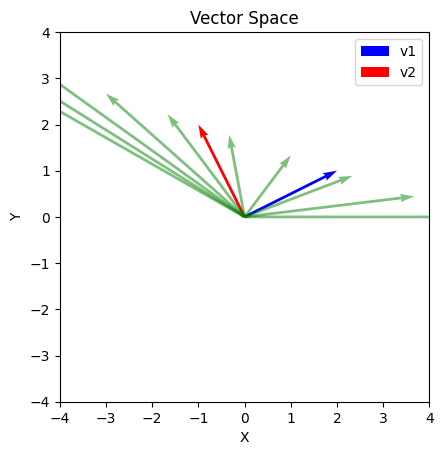

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vectors
v1 = np.array([2, 1])
v2 = np.array([-1, 2])

# Define the scalar values for linear combinations
s = np.linspace(-2, 2, 10)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the vectors
ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='b', label='v1')
ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='r', label='v2')

# Plot the linear combinations
for scalar in s:
    v = scalar * v1 + (1 - scalar) * v2
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='g', alpha=0.5)

# Set the limits for the plot
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])

# Set the aspect ratio of the plot to be equal
ax.set_aspect('equal', adjustable='box')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Add a legend
ax.legend()

# Set the plot title
ax.set_title('Vector Space')

# Show the plot
plt.show()


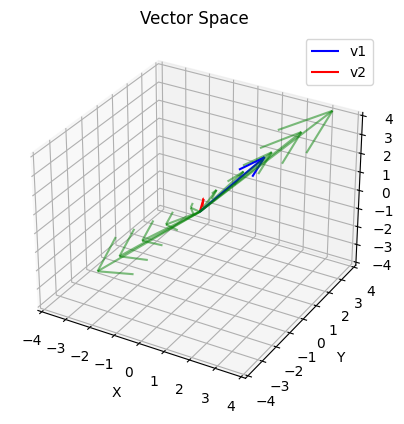

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the vectors
v1 = np.array([2, 1, 3])
v2 = np.array([-1, 2, -1])

# Define the scalar values for linear combinations
s = np.linspace(-2, 2, 10)

# Create a figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the vectors
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='b', label='v1')
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='r', label='v2')

# Plot the linear combinations
for scalar in s:
    v = scalar * v1 + (1 - scalar) * v2
    ax.quiver(0, 0, 0, v[0], v[1], v[2], color='g', alpha=0.5)

# Set the limits for the plot
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a legend
ax.legend()

# Set the plot title
ax.set_title('Vector Space')

# Show the plot
plt.show()


# Similarity between vectors

* **Euclidean Distance:** Euclidean distance, also known as the L2 distance, measures the straight-line distance between two vectors in the vector space. It considers both the magnitude and direction of the vectors. Euclidean distance is a commonly used metric to quantify dissimilarity, but it can also be inverted to represent similarity.
The Euclidean distance between two vectors, A and B, can be calculated using the following formula:

\begin{align}
\text{euclidean_distance} = \sqrt{\sum_{i=1}^{n} (A_i - B_i)^2}
\end{align}








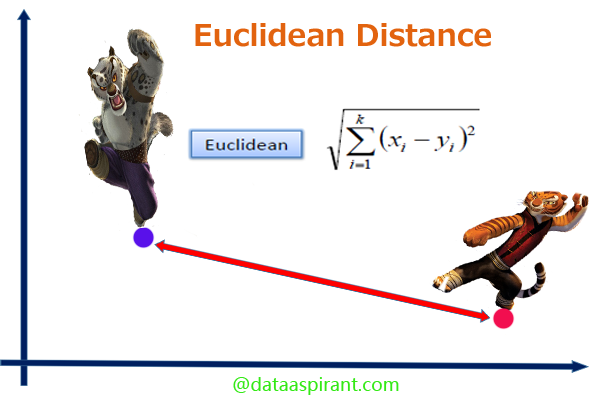

In [ ]:
import math

def euclidean_distance(vector1, vector2):
    if len(vector1) != len(vector2):
        raise ValueError("Vector dimensions must match")
    squared_distance = sum((x - y) ** 2 for x, y in zip(vector1, vector2))
    distance = math.sqrt(squared_distance)
    return distance

# Example usage
vector1 = [1, 2, 3, 6]
vector2 = [4, 5, 6, 9]

distance = euclidean_distance(vector1, vector2)
print("Euclidean Distance:", distance)


Euclidean Distance: 6.0


## Manhattan distance

Manhattan distance, also known as the L1 distance or city block distance, is a metric used to measure the distance between two points in a grid-like path, where the movement is restricted to horizontal and vertical directions. It calculates the sum of the absolute differences between the coordinates of two points.

The formula for Manhattan distance between two points (x1, y1) and (x2, y2) can be represented in LaTeX format as:


\begin{align}
\text{Manhattan distance} = |x1 - x2| + |y1 - y2|
\end{align}

In this formula, |x1 - x2| represents the absolute difference between the x-coordinates of the points, and |y1 - y2| represents the absolute difference between the y-coordinates of the points. The Manhattan distance is obtained by summing these absolute differences.

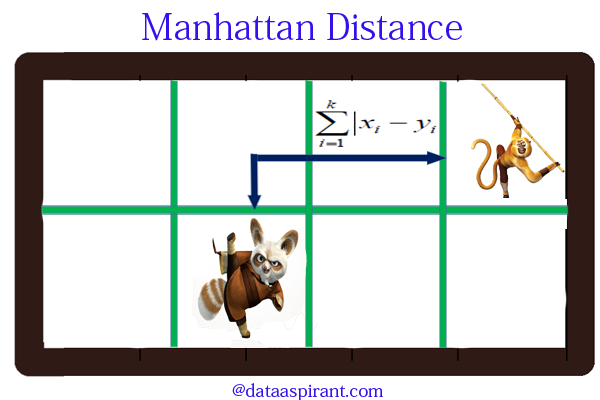

In [ ]:
def manhattan_distance(point1, point2):
    if len(point1) != len(point2):
        raise ValueError("Points must have the same number of dimensions")
    distance = sum(abs(x - y) for x, y in zip(point1, point2))
    return distance

# Example usage
point1 = [1, 2, 3, 6]
point2 = [4, 5, 6, 9]

distance = manhattan_distance(point1, point2)
print("Manhattan Distance:", distance)


Manhattan Distance: 12


#  **Cosine Similarity:**
 **Cosine Similarity:** Cosine similarity measures the cosine of the angle between two vectors. It calculates the similarity based on the orientation or direction of the vectors, rather than their magnitude. Cosine similarity ranges from -1 to 1, where -1 indicates perfectly opposite vectors, 0 indicates orthogonality (no similarity), and 1 indicates perfectly similar vectors.
The cosine similarity between two vectors, A and B, can be calculated using the following formula:

\begin{align}
  \text{cosine_similarity} = \frac{{\mathbf{A} \cdot \mathbf{B}}}{{\|\mathbf{A}\| \cdot \|\mathbf{B}\|}}
\end{align}

where,
1.
Magnitude is
 \begin{align}
 |\mathbf{v}| = \sqrt{v_1^2 + v_2^2 + \ldots + v_n^2}
 \end{align}

2. Dot Product is
 \begin{align}
 \mathbf{v} \cdot \mathbf{w} = v_1w_1 + v_2w_2 + \ldots + v_nw_n
 \end{align}

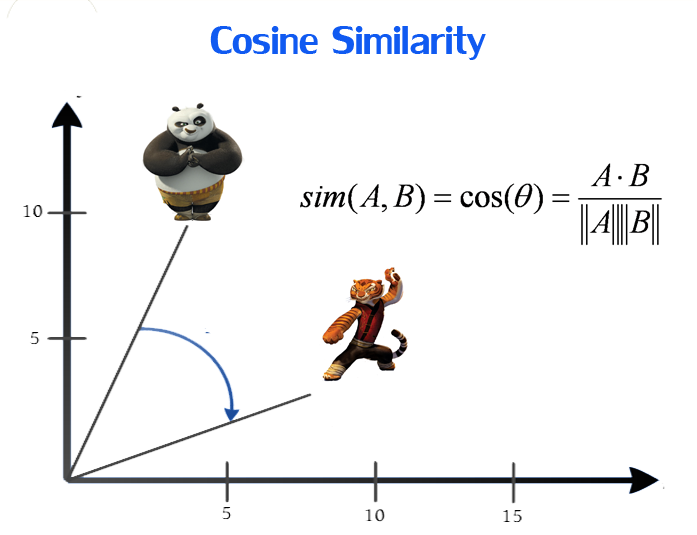

In [ ]:
import numpy as np

def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)
    similarity = dot_product / (magnitude1 * magnitude2)
    return similarity

# Example usage
vector1 = np.array([1, 2, 3, 6])
vector2 = np.array([4, -5, 6, -9])

similarity = cosine_similarity(vector1, vector2)
print("Cosine Similarity:", similarity)


Cosine Similarity: -0.47253691838892997


# Ok, what now?  Represent Text as vectors

Here are several common approaches to represent text as vectors:

* **Bag-of-Words (BoW):** The BoW approach represents text by creating a vocabulary or set of unique words present in the corpus. Each word in the vocabulary becomes a dimension in the vector space. The vector for a document is then created by counting the occurrences of each word in the document and placing those counts in the corresponding dimensions.

* **Term Frequency-Inverse Document Frequency (TF-IDF):** TF-IDF is a weighting scheme that assigns weights to the terms based on their importance in a document and across the corpus. It considers both the term frequency (TF), which measures the frequency of a term in a document, and the inverse document frequency (IDF), which measures the rarity of a term across the corpus. The TF-IDF approach results in vectors that highlight important terms while downplaying common ones.

* **Word Embeddings:** Word embeddings, such as Word2Vec or GloVe, are dense vector representations that capture semantic relationships between words. These models learn distributed representations of words based on the context in which they appear. By using pre-trained word embeddings or training your own on a large corpus, you can represent words as vectors and combine them to represent entire documents.

* **Neural Network-Based Approaches:** Advanced techniques like Recurrent Neural Networks (RNNs) and Convolutional Neural Networks (CNNs) can be employed to learn vector representations directly from raw text data. These models can capture complex patterns and dependencies in the text, resulting in more expressive vector representations.

# Bag-of-Words (BoW) Example

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Collection of documents
documents = [
    "I love dogs",
    "I like cats",
    "Dogs and cats are friends"
]

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the documents into a BoW matrix
bow_matrix = vectorizer.fit_transform(documents)

# Calculate cosine similarity between documents
cosine_sim = cosine_similarity(bow_matrix)
print(cosine_sim)

# Get the feature names (terms)
# feature_names = vectorizer.get_feature_names()

# Extract vectors from the BoW matrix
vector1 = bow_matrix[0].toarray().flatten()
vector2 = bow_matrix[1].toarray().flatten()
vector3 = bow_matrix[2].toarray().flatten()

# Calculate Manhattan distance between the first and second documents
manhattan_distance = np.sum(np.abs(vector1 - vector2))

# Calculate Euclidean distance between the first and third documents
euclidean_distance = np.linalg.norm(vector1 - vector2)

# Print the cosine similarity, Manhattan distance, and Euclidean distance
print("Cosine Similarity between Documents 1 and 2:", cosine_sim[0, 1])
print("Manhattan Distance between Documents 1 and 2:", manhattan_distance)
print("Euclidean Distance between Documents 1 and 2:", euclidean_distance)


[[1.         0.         0.31622777]
 [0.         1.         0.31622777]
 [0.31622777 0.31622777 1.        ]]
Cosine Similarity between Documents 1 and 2: 0.0
Manhattan Distance between Documents 1 and 2: 4
Euclidean Distance between Documents 1 and 2: 2.0


# Term Frequency-Inverse Document Frequency (TF-IDF) Example

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Collection of documents
documents = [
    "I love dogs",
    "I like cats",
    "Dogs and cats are friends"
]

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the documents into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(documents)


# Calculate cosine similarity between documents
cosine_sim = cosine_similarity(tfidf_matrix)

# Get the feature names (terms)

# Extract vectors from the TF-IDF matrix
vector1 = tfidf_matrix[0].toarray().flatten()
vector2 = tfidf_matrix[1].toarray().flatten()
vector3 = tfidf_matrix[2].toarray().flatten()

# Calculate Manhattan distance between the first and second documents
manhattan_distance = np.sum(np.abs(vector1 - vector2))

# Calculate Euclidean distance between the first and third documents
euclidean_distance = np.linalg.norm(vector1 - vector2)

# Print the cosine similarity, Manhattan distance, and Euclidean distance
print("Cosine Similarity between Documents 1 and 2:", cosine_sim[0, 1])
print("Manhattan Distance between Documents 1 and 2:", manhattan_distance)
print("Euclidean Distance between Documents 1 and 2:", euclidean_distance)


Cosine Similarity between Documents 1 and 2: 0.0
Manhattan Distance between Documents 1 and 2: 2.802618099348914
Euclidean Distance between Documents 1 and 2: 1.414213562373095


# Embeddings is "the King"

What is Word Embeddings?

Word Embeddings are dense representations of the individual words in a text, taking into account the context and other surrounding words that that individual word occurs with.



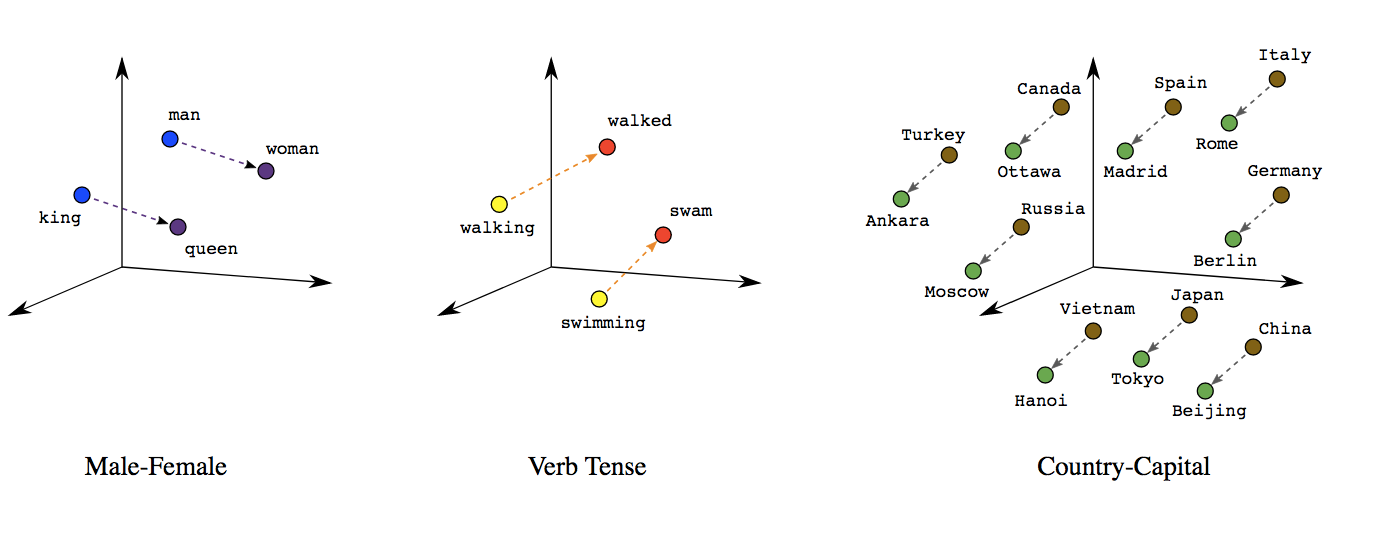

In [ ]:
!python -m spacy download en

2023-07-09 10:15:29.124319: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 10:15:30.194682: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 62.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import spacy

# Load pre-trained word embeddings
nlp = spacy.load("en_core_web_sm")

# Collection of documents
documents = [
    "I love dogs",
    "I adore hound",
    "Dogs and cats are friends"
]

# Calculate document embeddings
document_embeddings = [nlp(doc).vector for doc in documents]

# Convert embeddings to numpy array
document_embeddings = np.array(document_embeddings)

# Calculate cosine similarity between documents
cosine_sim = cosine_similarity(document_embeddings)

# Extract cosine similarity values
cosine_sim_values = cosine_sim[np.triu_indices(len(documents), k=1)]

# Calculate Manhattan distance between the first and second documents
manhattan_distance = np.sum(np.abs(document_embeddings[0] - document_embeddings[1]))

# Calculate Euclidean distance between the first and third documents
euclidean_distance = np.linalg.norm(document_embeddings[0] - document_embeddings[1])

# Print the cosine similarity, Manhattan distance, and Euclidean distance
print("Cosine Similarity between Documents 1 and 2:", cosine_sim_values[0])
print("Manhattan Distance between Documents 1 and 2:", manhattan_distance)
print("Euclidean Distance between Documents 1 and 2:", euclidean_distance)


Cosine Similarity between Documents 1 and 2: 0.6955537
Manhattan Distance between Documents 1 and 2: 31.714336
Euclidean Distance between Documents 1 and 2: 3.9436612


## Serveral organizations released their own version of their Embeddings.

Some of them are

1. https://code.google.com/archive/p/word2vec/
2. https://nlp.stanford.edu/projects/glove/
3. OpenAI
4. Bert


Using these concepts, here is a simple vector search implementation


In [ ]:
import numpy as np
import spacy
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained word embeddings
nlp = spacy.load("en_core_web_sm")

# Sample documents
documents = [
    "I love dogs",
    "I hate cats",
    "Dogs and cats are friends",
    "I have a pet dog"
]

# Embed all documents
document_embeddings = [nlp(doc).vector for doc in documents]
# print(document_embeddings[0])

# Vectorize query
query = "I like animals"
query_embedding = nlp(query).vector

# Calculate cosine similarity between query and document embeddings
similarities = cosine_similarity([query_embedding], document_embeddings)
# print(similarities)

# Get the most similar document
most_similar_index = np.argmax(similarities)
most_similar_document = documents[most_similar_index]

# Print the most similar document
print("Most Similar Document:", most_similar_document)


Most Similar Document: I love dogs


# Can we create our own embeddings?

## yes, we can use neural network to do so. This is only used when your document corpouse is very domain specific and cannot be generalized. LLM are taken as base and trained to be more specific.

In [12]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from sklearn.metrics.pairwise import cosine_similarity

# Sample documents
documents = [
    "I love dogs",
    "I hate cats",
    "Dogs and cats are friends",
    "I have a pet dog"
]

# Create a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(documents)

# Convert documents to sequences of word indices
sequences = tokenizer.texts_to_sequences(documents)

# Determine the maximum sequence length
max_length = max([len(seq) for seq in sequences])

# Pad sequences to have the same length
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# Define the neural network model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(embedding_dim, activation='linear'))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Define target outputs as zeros with shape (num_documents, embedding_dim)
target_outputs = np.zeros((len(padded_sequences), embedding_dim))

# Train the model
model.fit(padded_sequences, target_outputs, epochs=10, verbose=1)

# Get the document embeddings
document_embeddings = model.predict(padded_sequences)

# New query
query = "I like animals"

# Convert the query to a sequence of word indices
query_sequence = tokenizer.texts_to_sequences([query])

# Pad the query sequence to match the maximum length
query_padded = pad_sequences(query_sequence, maxlen=max_length)

# Get the embedding for the query
query_embedding = model.predict(query_padded)

# Calculate cosine similarity between query and document embeddings
similarities = cosine_similarity(query_embedding, document_embeddings)

# Get the most similar document
most_similar_index = np.argmax(similarities)
most_similar_document = documents[most_similar_index]

# Print the most similar document
print("Most Similar Document:", most_similar_document)


Epoch 1/10
1/1 [==============================] - 1s 822ms/step - loss: 2.4987e-04
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 1.9975e-04
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 1.5777e-04
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 1.2397e-04
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 9.7615e-05
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 7.7663e-05
Epoch 7/10
1/1 [==============================] - 0s 14ms/step - loss: 6.2960e-05
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 5.2355e-05
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 4.4777e-05
Epoch 10/10
1/1 [==============================] - 0s 35ms/step
Most Similar Document: I love dogs


# We are also embedding audio and Images similar to Text for image search and audio search using vectors.

In [16]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

# URL of the image
image_url = "https://upload.wikimedia.org/wikipedia/commons/3/34/Elon_Musk_Royal_Society_%28crop2%29.jpg"  # Replace with the URL of the image you want to download

# Download and preprocess the image
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
img = img.resize((224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Extract embeddings
embeddings = model.predict(x)

# Print the embeddings
print("Image Embeddings:", embeddings)


1/1 [==============================] - 1s 1s/step
Image Embeddings: [[1.7385929 1.650593  0.        ... 0.        0.        1.0706773]]


# For real world applications you can use either Elastic Search or Azure Cognitive Search

# Lets quickly do this for real world applications using Azure Cognitive Search